In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('seasonalitysales.csv')
df.head()

,Product ID,Date,Sales,Sales Revenue,Month,Weekday,Festival Flag,Promotion,Price,Stock Levels,Advertising Spend,Weather,Event Type,Customer Segment,Region
0,Product_1,01-01-2022,36,756.00,January,Saturday,1,No,21.00,67,242,Winter,Christmas Sale,Young Adults,West
1,Product_1,01-03-2022,23,254.38,March,Tuesday,1,No,11.06,60,833,Fall,New Year Sale,Adults,East
2,Product_1,01-04-2022,67,1802.30,April,Friday,0,No,26.90,81,259,Summer,NaN,Adults,North
3,Product_1,01-05-2022,294,6985.44,May,Sunday,0,No,23.76,77,926,Winter,NaN,Young Adults,West
4,Product_1,01-06-2022,410,5391.50,June,Wednesday,0,Yes,13.15,85,949,Monsoon,NaN,Young Adults,South


1: Identify Seasonal Trends in Demand

In [170]:
df.describe()

,Sales,Sales Revenue,Festival Flag,Price,Stock Levels,Advertising Spend
count,5402.000000,5402.000000,5402.000000,5402.000000,5402.000000,5402.000000
mean,228.197705,6815.972555,0.269160,29.970072,105.361903,544.927990
std,120.629486,4653.254886,0.443564,11.594276,54.954526,262.744236
min,20.000000,201.800000,0.000000,10.030000,10.000000,100.000000
25%,126.000000,3120.470000,0.000000,19.792500,58.000000,314.000000
50%,226.000000,5757.440000,0.000000,29.990000,106.000000,543.000000
75%,327.750000,9611.860000,1.000000,40.097500,152.000000,770.000000
max,500.000000,24011.520000,1.000000,49.990000,200.000000,1000.000000


In [174]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         5402 non-null   object 
 1   Date               5402 non-null   object 
 2   Sales              5402 non-null   int64  
 3   Sales Revenue      5402 non-null   float64
 4   Month              5402 non-null   object 
 5   Weekday            5402 non-null   object 
 6   Festival Flag      5402 non-null   int64  
 7   Promotion          5402 non-null   object 
 8   Price              5402 non-null   float64
 9   Stock Levels       5402 non-null   int64  
 10  Advertising Spend  5402 non-null   int64  
 11  Weather            5402 non-null   object 
 12  Event Type         1073 non-null   object 
 13  Customer Segment   5402 non-null   object 
 14  Region             5402 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 633.2+ KB


Product ID              0
Date                    0
Sales                   0
Sales Revenue           0
Month                   0
Weekday                 0
Festival Flag           0
Promotion               0
Price                   0
Stock Levels            0
Advertising Spend       0
Weather                 0
Event Type           4329
Customer Segment        0
Region                  0
dtype: int64

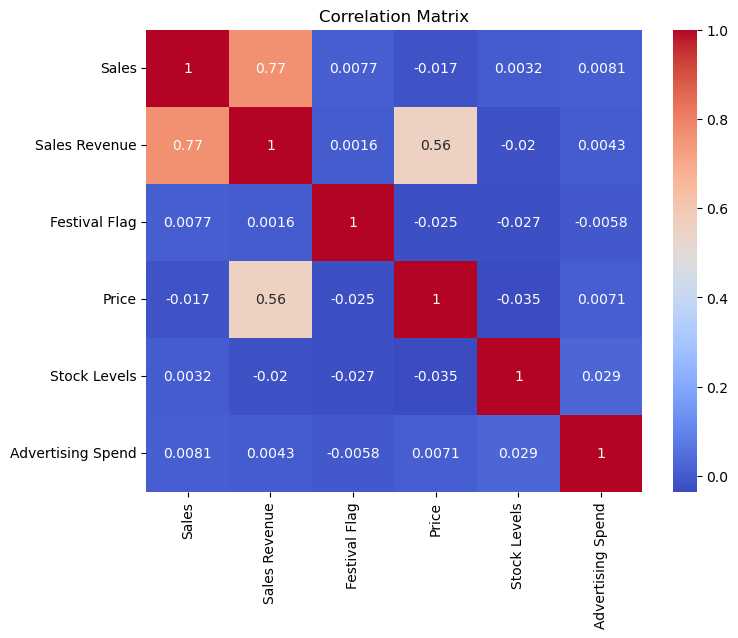

In [176]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [180]:
monthly_sales = df.groupby('Month', observed=True)['Sales'].sum().reset_index()

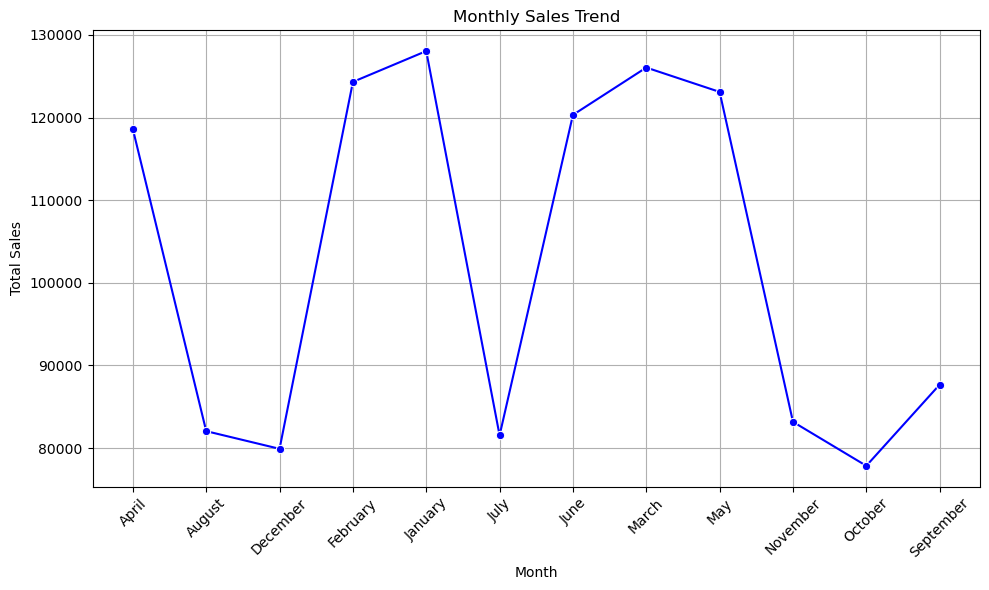

In [184]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [190]:
weather_sales = df.groupby('Weather', observed=True)['Sales'].sum().reset_index()

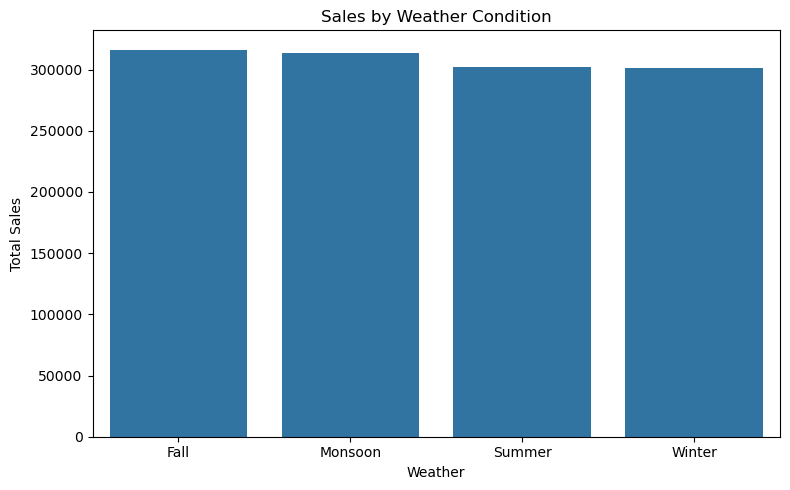

In [196]:
plt.figure(figsize=(8, 5))
colors = sns.color_palette("Set2", len(weather_sales))
sns.barplot(data=weather_sales, x='Weather', y='Sales')
plt.title("Sales by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

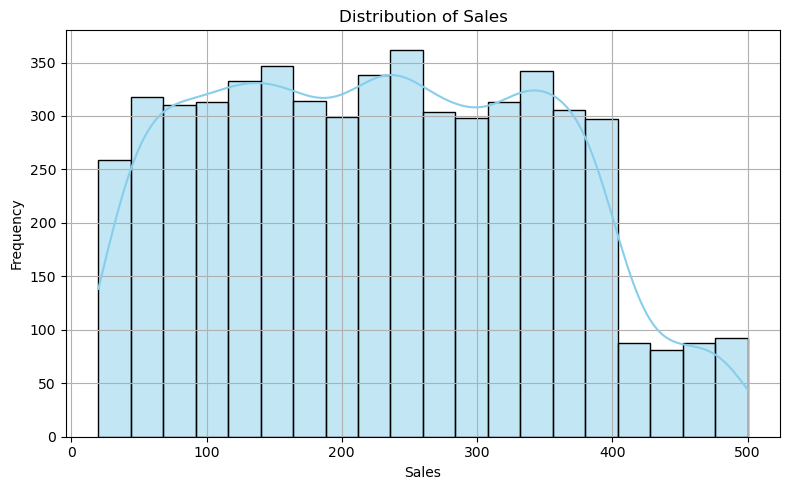

In [198]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

 2: Evaluate the Impact of Promotions and Advertising

In [203]:
print(df['Promotion'].unique())

['No' 'Yes']


In [205]:
promotion_sales = df.groupby('Promotion', observed=True)['Sales'].mean().reset_index()
promotion_sales

,Promotion,Sales
0,No,207.282637
1,Yes,278.118495


C:\Users\dhima\AppData\Local\Temp\ipykernel_23660\3807799536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promotion_sales, x='Promotion', y='Sales', palette=colors)


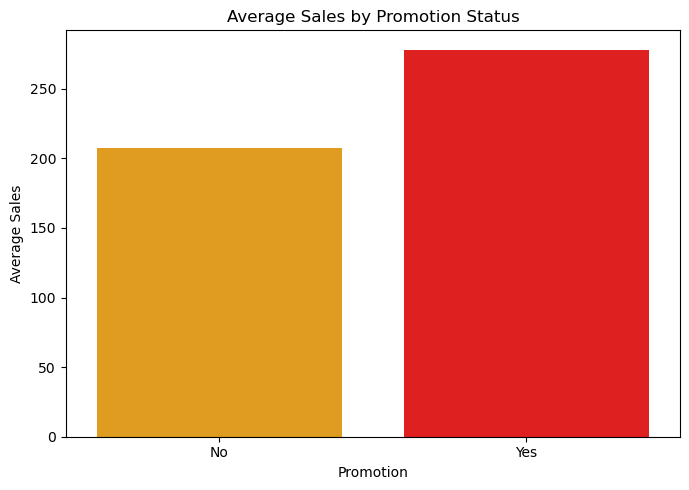

In [215]:
plt.figure(figsize=(7, 5))
colors = ['orange', 'red']
sns.barplot(data=promotion_sales, x='Promotion', y='Sales', palette=colors)
plt.title("Average Sales by Promotion Status")
plt.xlabel("Promotion")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

C:\Users\dhima\AppData\Local\Temp\ipykernel_23660\2362558684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Promotion', y='Sales', palette='Set3')


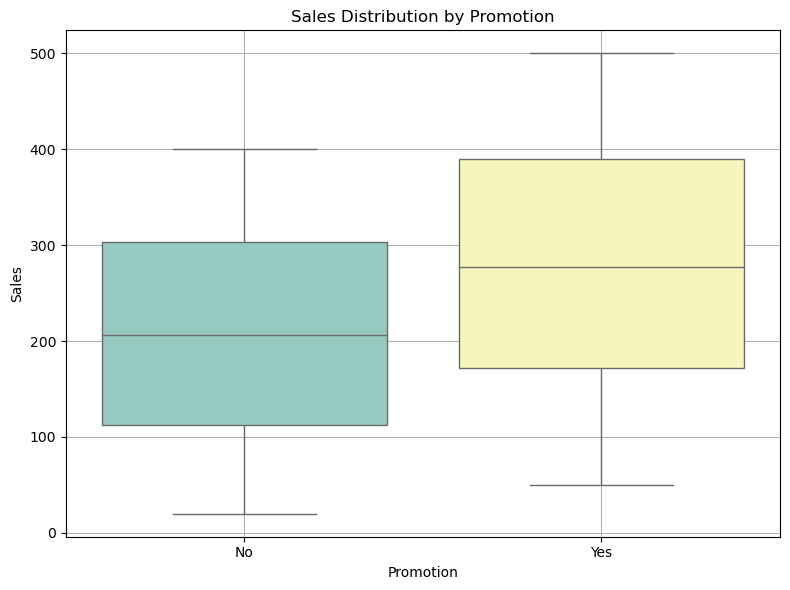

In [209]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Promotion', y='Sales', palette='Set3')
plt.title("Sales Distribution by Promotion")
plt.xlabel("Promotion")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

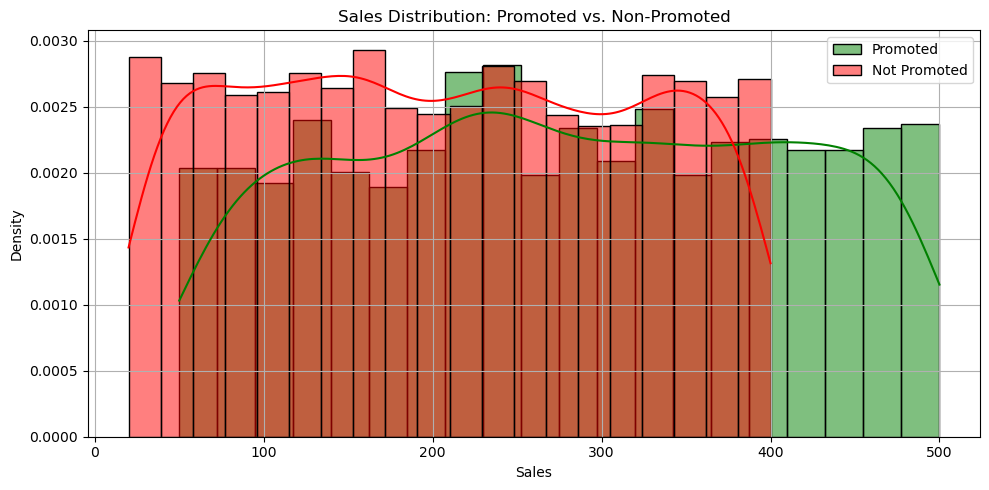

In [219]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Promotion'] == 'Yes'], x='Sales', color='green', label='Promoted', kde=True, stat='density', bins=20)
sns.histplot(data=df[df['Promotion'] == 'No'], x='Sales', color='red', label='Not Promoted', kde=True, stat='density', bins=20)
plt.title("Sales Distribution: Promoted vs. Non-Promoted")
plt.xlabel("Sales")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3: Forecast Future Demand

In [225]:
df['Date'] = pd.to_datetime(df['Date'])

In [227]:
df['Month_Year'] = df['Date'].dt.to_period('M')

In [231]:
monthly_sales = df.groupby('Month_Year', observed=True)['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)

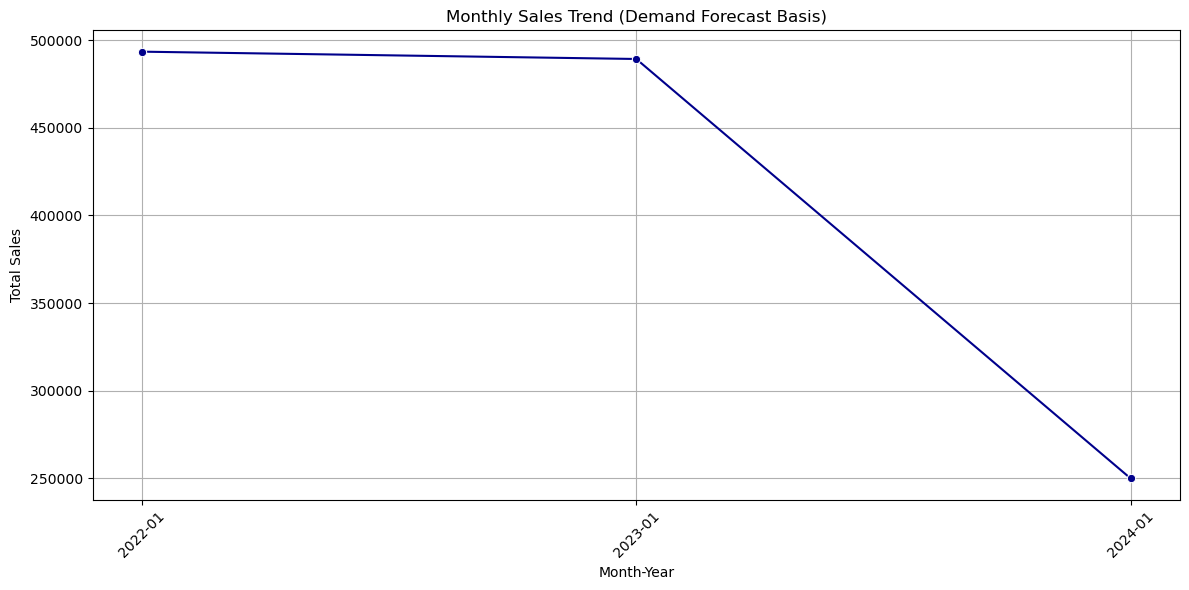

In [245]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales', marker='o', color='darkblue')
plt.title("Monthly Sales Trend (Demand Forecast Basis)")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

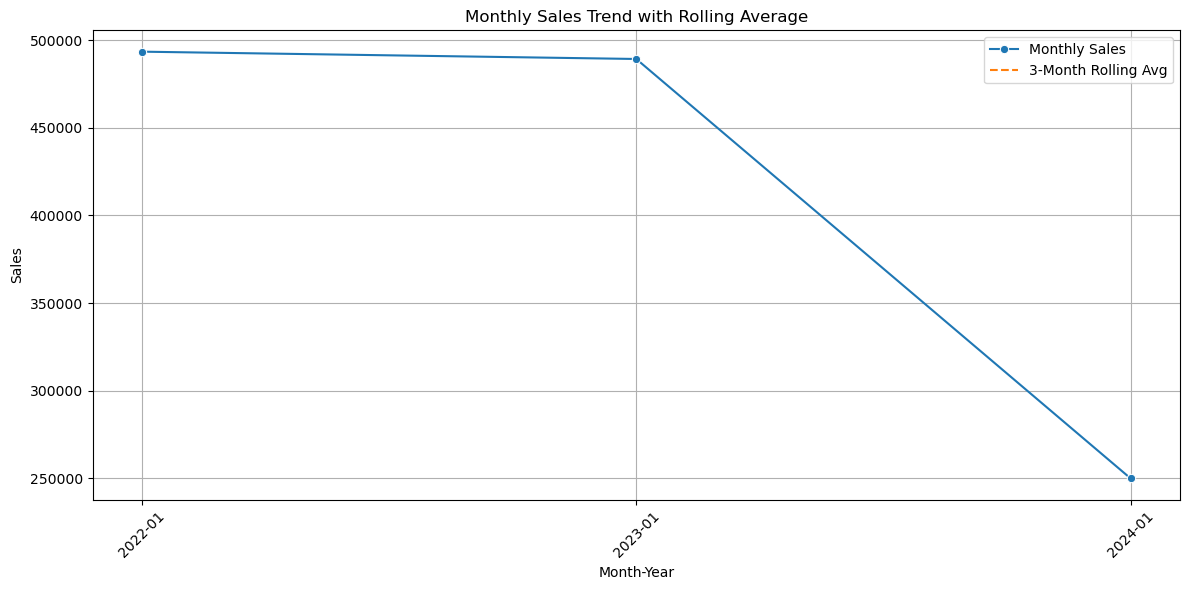

In [247]:
monthly_sales['Rolling_Sales'] = monthly_sales['Sales'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Year', y='Sales', data=monthly_sales, label='Monthly Sales', marker='o')
sns.lineplot(x='Month_Year', y='Rolling_Sales', data=monthly_sales, label='3-Month Rolling Avg', linestyle='--')
plt.title("Monthly Sales Trend with Rolling Average")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4: Understand Customer Segmentation

In [253]:
df['Customer Segment'].unique()

array(['Young Adults', 'Adults', 'Teens'], dtype=object)

In [257]:
segment_sales = df.groupby('Customer Segment')['Sales'].mean().reset_index().sort_values(by='Sales', ascending=False)
segment_sales

,Customer Segment,Sales
0,Adults,230.611111
2,Young Adults,230.198751
1,Teens,223.857926


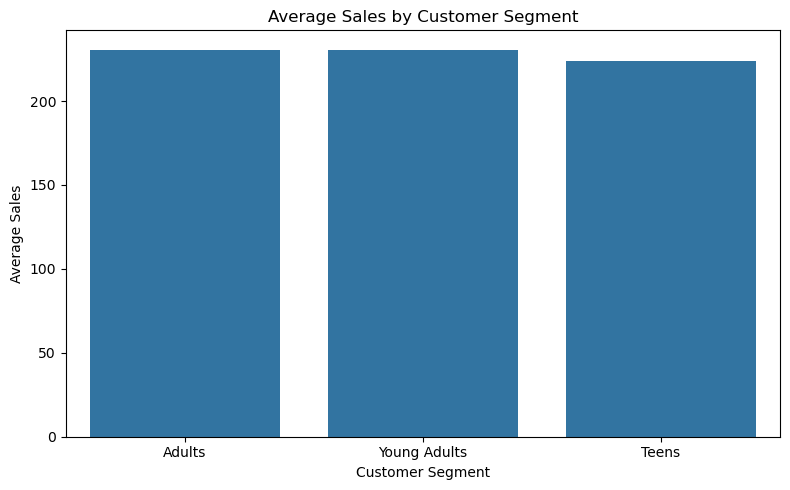

In [261]:
plt.figure(figsize=(8, 5))
sns.barplot(data=segment_sales, x='Customer Segment', y='Sales')
plt.title("Average Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

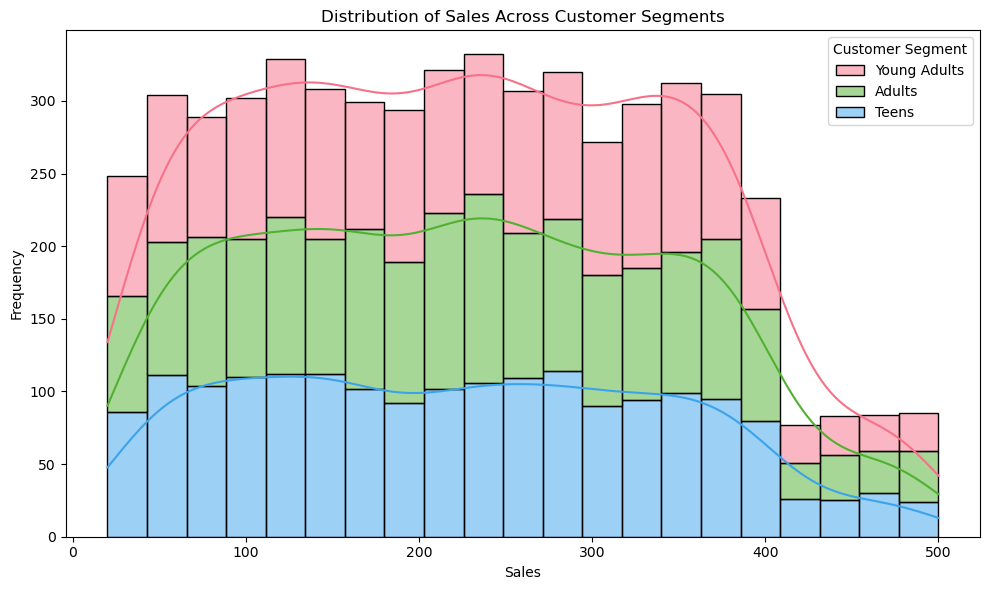

In [265]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sales', hue='Customer Segment', kde=True, multiple='stack', palette='husl')
plt.title("Distribution of Sales Across Customer Segments")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\dhima\AppData\Local\Temp\ipykernel_23660\2033254672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer Segment', y='Sales', palette='Pastel1')


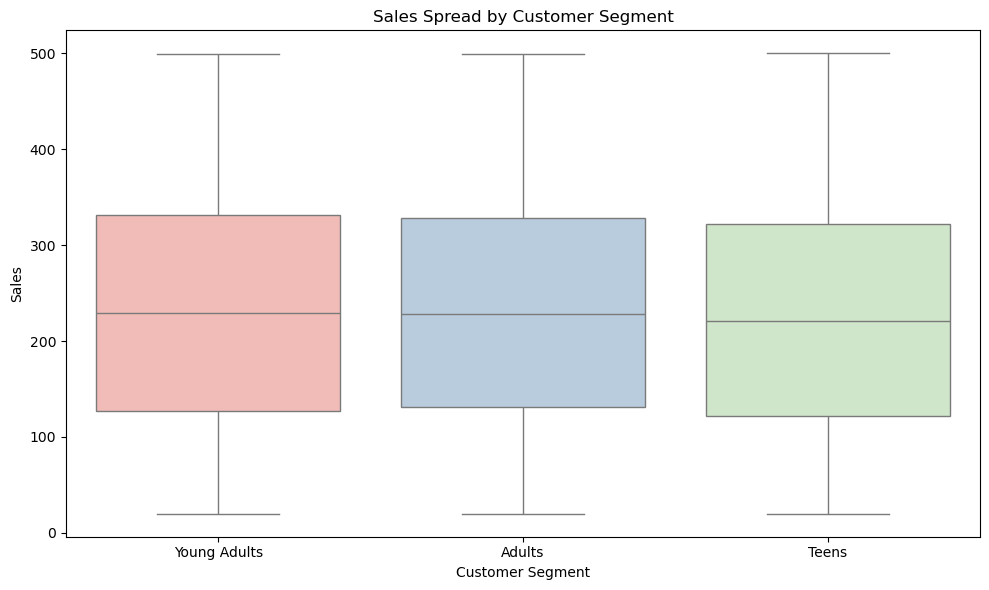

In [267]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer Segment', y='Sales', palette='Pastel1')
plt.title("Sales Spread by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

5: Regional and Event-based Performance

In [273]:
df.columns.tolist()

['Product ID',
 'Date',
 'Sales',
 'Sales Revenue',
 'Month',
 'Weekday',
 'Festival Flag',
 'Promotion',
 'Price',
 'Stock Levels',
 'Advertising Spend',
 'Weather',
 'Event Type',
 'Customer Segment',
 'Region',
 'Month_Year']

In [277]:
df.columns = df.columns.str.strip()

In [327]:
regional_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
regional_sales

Region
East     63222
West     61347
North    59690
South    57833
Name: Sales, dtype: int64

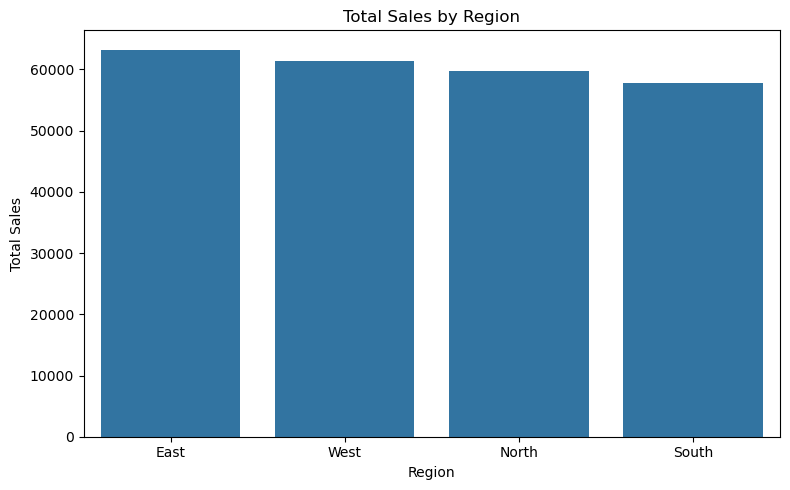

In [321]:
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

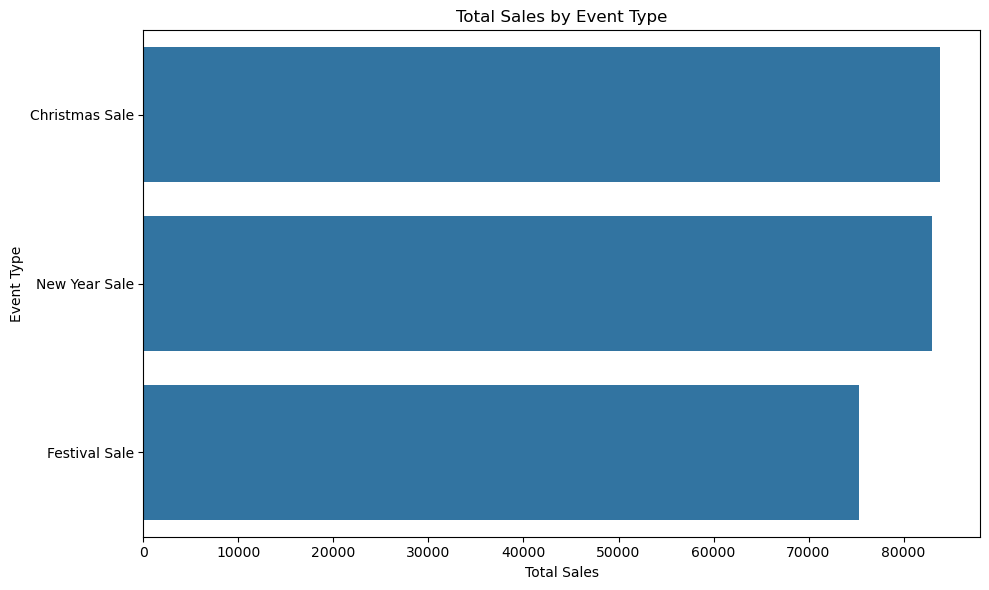

In [323]:
# 2. Total Sales by Event Type
event_sales = df.groupby('Event Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=event_sales.values, y=event_sales.index)
plt.title("Total Sales by Event Type")
plt.xlabel("Total Sales")
plt.ylabel("Event Type")
plt.tight_layout()
plt.show()

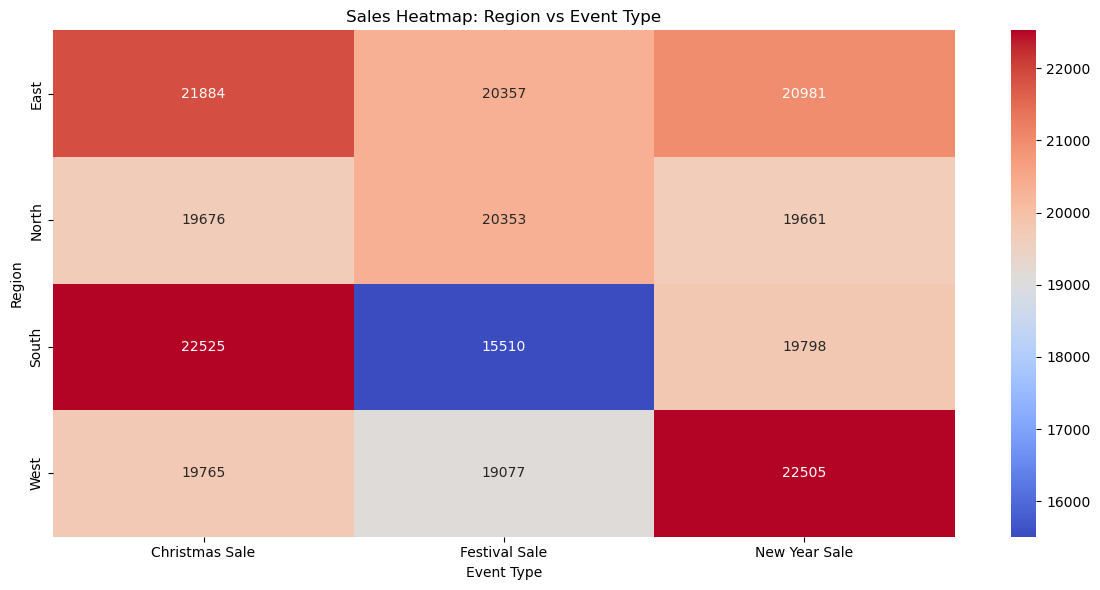

In [325]:
pivot = df.pivot_table(index='Region', columns='Event Type', values='Sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Sales Heatmap: Region vs Event Type")
plt.tight_layout()
plt.show()